In [ ]:
https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 6 10 11 25 27 50 46 52 96 105 140 225 252 327 352 399 461 526 639 645 678 727 792 810 731 724 697 680 717 726 643 527 523 452 465 444 434 360 335 294 32 936 154 235 167 394 -7 330 92 434 132 10 107 452 -65 257 -29 267 181 79 

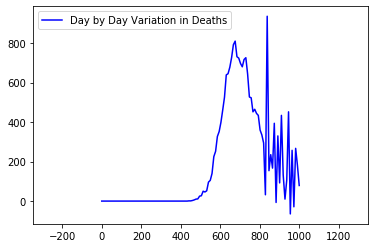

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = DataAsInteger
variation=[]
previous=0
for i in range(1,len(data)):
    print(data[i]-data[i-1], end = " ")
    variation.append(data[i]-data[i-1])
X=np.asarray(variation)
#Y=np.asarray(range(0,len(variation)))
Y = np.linspace(0, 1000, len(X))
fig, ax = plt.subplots()
ax.plot(Y,X, '-b', label='Day by Day Variation in Deaths')
#ax.plot(X, np.cos(X), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();


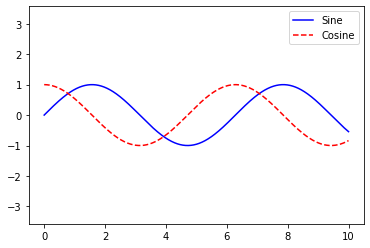

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.axis('equal')
leg = plt.legend();


In [2]:
import requests as req
# Create an empty list
ALLdata=[]

URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
print (len(lines))
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    #convert the splitlines to strings
    line= str(line).split(",")
    ALLdata.append(line)
    
"""
Finding counties with a "threshhold" increase in deaths for the last three consecutive days.
How to inspect last four entries of data to see if the number of deaths has increased:
To make it easy to understand lets use the following three dates instead of data.
May10 May11 May12 May13
Subract May10 from May11 check if the result is above the 'Threshhold'
Subract May11 from May12 check if the result is above the 'Threshhold'
Subract May12 from May13 check if the result is above the 'Threshhold'
If all three conditions are met, print the location and information.
"""    
    
Threshhold = 5
count = 0
STATE =[]
COUNTY =[]
Points =[]
HISTORY=[]
SUM =[]
SORTED =[]
lat=[]
long=[]
# Check each line of data, county by county.
for i in range(1,len(ALLdata)):
    # Increase a counter for every line -  this will allow further investigation into the data
    # as demonstarted in the next four cells.
    count=count+1
    # subtract the last four days of data to see if it has increased by the minimum of the Threshhold each day
    if int(ALLdata[i][-3])-int(ALLdata[i][-4]) >Threshhold and int(ALLdata[i][-2])-int(ALLdata[i][-3]) >Threshhold and int(ALLdata[i][-1])-int(ALLdata[i][-2]) >Threshhold:
        # if they do increase as specified, define the line as a variable called history
        history=[int(ALLdata[i][-3])-int(ALLdata[i][-4]),int(ALLdata[i][-2])-int(ALLdata[i][-3]),int(ALLdata[i][-1])-int(ALLdata[i][-2])]
        HISTORY.append(history)
        Sum=(int(ALLdata[i][-3])-int(ALLdata[i][-4]))+(int(ALLdata[i][-2])-int(ALLdata[i][-3]))+(int(ALLdata[i][-1])-int(ALLdata[i][-2]))
        SUM.append(Sum)
        # The total amount of deaths in the specific county
        deaths = int(ALLdata[i][-1])
        # The county's name
        county = ALLdata[i][5]
        # The State the county is located in
        state = ALLdata[i][6]
        STATE.append(state)
        COUNTY.append(county)
        # The longitude and latitude of the county
        longitude = ALLdata[i][9]
        latitude = ALLdata[i][8]
        long.append(float(longitude))
        lat.append(float(latitude))
        Points.append([float(longitude),float(latitude)])
        #print the data line by line
        print ("i="+str(count),deaths,county,state,longitude,latitude,history,Sum)
        SORTED.append([Sum,"i="+str(count),deaths,county,state,longitude,latitude,history])

3262
i=210 1660 Los Angeles California -118.2282411 34.30828379 [39, 46, 44] 129
i=314 1068 Fairfield Connecticut -73.3881171 41.26809896 [10, 12, 22] 44
i=315 963 Hartford Connecticut -72.73103891 41.80283011 [12, 10, 32] 54
i=318 745 New Haven Connecticut -72.93620426 41.4080325 [15, 7, 22] 44
i=616 2589 Cook Illinois -87.81658794 41.84144849 [44, 88, 140] 272
i=751 440 Marion Indiana -86.13826325 39.78163624 [7, 6, 11] 24
i=1213 422 Montgomery Maryland -77.20358245 39.13676329 [6, 19, 15] 40
i=1214 389 Prince George's Maryland -76.8496441 38.83070039 [6, 14, 16] 36
i=1227 704 Essex Massachusetts -70.94687179 42.6687626 [25, 9, 26] 60
i=1229 475 Hampden Massachusetts -72.63235561 42.13440424 [9, 6, 11] 26
i=1231 1282 Middlesex Massachusetts -71.39049229 42.48607732 [28, 9, 38] 75
i=1318 2156 Wayne Michigan -83.281255 42.28098405 [8, 35, 16] 59
i=1346 426 Hennepin Minnesota -93.47694895 45.00761521 [9, 14, 14] 37
i=1786 1482 Essex New Jersey -74.24657979 40.78681335 [8, 17, 34] 59
i=1

In [3]:
DataAsString = ALLdata[1864][14:]
print (DataAsString)
DataAsInteger = list(map(int, DataAsString))
print(". . . .")
print(DataAsInteger)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '2', '5', '11', '21', '32', '57', '84', '134', '180', '232', '328', '433', '573', '798', '1050', '1377', '1729', '2128', '2589', '3115', '3754', '4399', '5077', '5804', '6596', '7406', '8137', '8861', '9558', '10238', '10955', '11681', '12324', '12851', '13374', '13826', '14291', '14735', '15169', '15529', '15864', '16158', '16190', '17126', '17280', '17515', '17682', '18076', '18069', '18399', '18491', '18925', '19057', '19067', '19174', '19626', '19561', '19818', '19789', '20056', '20237', '20316']
. . . .
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 11, 21, 32, 57, 84, 134, 180, 232, 328, 433, 573, 798, 1050, 1377, 172

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 6 10 11 25 27 50 46 52 96 105 140 225 252 327 352 399 461 526 639 645 678 727 792 810 731 724 697 680 717 726 643 527 523 452 465 444 434 360 335 294 32 936 154 235 167 394 -7 330 92 434 132 10 107 452 -65 257 -29 267 181 79 

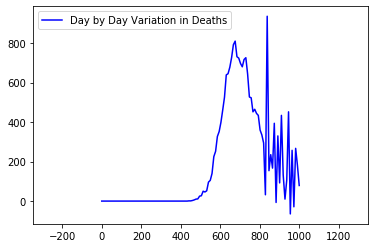

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = DataAsInteger
variation=[]
previous=0
for i in range(1,len(data)):
    print(data[i]-data[i-1], end = " ")
    variation.append(data[i]-data[i-1])
X=np.asarray(variation)
#Y=np.asarray(range(0,len(variation)))
Y = np.linspace(0, 1000, len(X))
fig, ax = plt.subplots()
ax.plot(Y,X, '-b', label='Day by Day Variation in Deaths')
#ax.plot(X, np.cos(X), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();


In [5]:
print("SumLastThreeDays, ItemLine, TotalDeaths, Country, State, Long, Lat, IncreasePerDay(LastThreeDays)\n")
for line in sorted(SORTED, reverse=True):
    print (line)

SumLastThreeDays, ItemLine, TotalDeaths, Country, State, Long, Lat, IncreasePerDay(LastThreeDays)

[527, 'i=1864', 20316, 'New York', 'New York', '-73.97152637', '40.7672726', [267, 181, 79]]
[272, 'i=616', 2589, 'Cook', 'Illinois', '-87.81658794', '41.84144849', [44, 88, 140]]
[129, 'i=210', 1660, 'Los Angeles', 'California', '-118.2282411', '34.30828379', [39, 46, 44]]
[75, 'i=1231', 1282, 'Middlesex', 'Massachusetts', '-71.39049229', '42.48607732', [28, 9, 38]]
[63, 'i=1885', 1680, 'Suffolk', 'New York', '-72.8012172', '40.88320119', [22, 15, 26]]
[60, 'i=1227', 704, 'Essex', 'Massachusetts', '-70.94687179', '42.6687626', [25, 9, 26]]
[59, 'i=1786', 1482, 'Essex', 'New Jersey', '-74.24657979', '40.78681335', [8, 17, 34]]
[59, 'i=1318', 2156, 'Wayne', 'Michigan', '-83.281255', '42.28098405', [8, 35, 16]]
[54, 'i=315', 963, 'Hartford', 'Connecticut', '-72.73103891', '41.80283011', [12, 10, 32]]
[44, 'i=318', 745, 'New Haven', 'Connecticut', '-72.93620426', '41.4080325', [15, 7, 22]]
[

In [ ]:
# To view the header use ALLdata[0] that is the first line:
print ("This is the first line or `The header`.\n",ALLdata[0])

In [ ]:
# Use the `i` value ( i=616 ) to view the entire line of data.
# Example:  To see i=616 enter:  616
i =input("Enter a value for `i`: ")
i = int(i)
print ("\nThe data at position ALLdata["+str(i)+"]\n----------\n",ALLdata[i])

In [ ]:
for i in range(0,len(COUNTY)):
    #print(COUNTY[i],STATE[i])
    print('{:<12} {:>12}'.format(COUNTY[i],STATE[i]))
    
#Los Angeles  California        

In [ ]:
data = DataAsInteger
variation=[]
previous=0
for i in range(1,len(data)):
    print(data[i]-data[i-1], end = " ")
    variation.append(data[i]-data[i-1])


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import numpy as np
inc= len(Y)
colorZ = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','navy']
colors = colorZ[-inc:]

y=np.asarray(long)
x=np.asarray(lat)


#plt.scatter(y,x, s=40, color=colors)

for i in range(0,len(lat)-1):
    #p1, = plt.plot(float(long[i]),float(lat[i]), color=colors[i])
    plt.scatter(float(long[i]),float(lat[i]), color=colors[i])
    #p3, = plt.text(float(long[i]),float(lat[i]), COUNTY[i])
    #p3, = plt.scatter(float(long[i]),float(lat[i]), color=colors[i])
    print(long[i],lat[i])
    '''
    l = plt.legend([(p2)], ['Two keys'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)})
    '''

In [ ]:
print(y[1])

In [ ]:
colorZ = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','navy']

inc= len(y)

colors = colorZ[-inc:]
colorS = colorZ[0:inc]
print(colors)
print(len(colors))
print(colorS)
print(len(colorS))

print(len(y))

In [ ]:
negative=plt.scatter(x,y,s=12, color=colors, label='negative')
positive= plt.scatter(y,x,s=6, color=colors,label = 'positive')
plt.legend(handles=[negative,positive])

In [ ]:
negative=plt.plot(x,y,linestyle ='dashed', label='negative')
positive= plt.plot(y,x,label = 'positive')
plt.legend(handles=[negative[0],positive[0],])

In [ ]:
negative=plt.plot(x,lat,linestyle ='dashed', label='negative')
positive= plt.plot(x,long,label = 'positive')
plt.legend(handles=[negative[0],positive[0]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

c = np.char.array(COUNTY)
S = np.char.array(STATE)
y = np.array(long)
x =np.array(lat)

inc= len(COUNTY)
colorZ = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','navy']
colors = colorZ[-inc:]


plt.scatter(x,y, s=40, color=colors)

labels = ['{0}, {1}'.format(i,j) for i,j in zip(c, S)]



sortlegend0 = [colors[0], labels[0],]
sortlegend1 = [colors[1], labels[1],]
print (sortlegend0,sortlegend1)
#plt.legend([(sortlegend0,sortlegend1)], loc='left center', bbox_to_anchor=(-0.1, 1.),
#           fontsize=8)


#l = plt.legend([(sortlegend0,sortlegend1)], ['Two keys'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)})



"""
plt.legend(handles=sortlegend, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
"""
plt.savefig('piechart.png', bbox_inches='tight')


#plt.legend(handles=[line_up, line_down])

In [ ]:
inc= len(Points)
colorZ = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan','navy']
colors = colorZ[-inc:]


text0 = COUNTY
text = STATE
for i in range(len(Points)):
    x = Points[i][0]
    y = Points[i][1]
    tx = text0[i]+", "+text[i]
    #xx, yy = m(x,y)
    #print(xx, yy)
    print(x, y)
    print(colors[i])
    c=colors[i]
    #plt.plot(xx, yy, 'bo')
    #plt.scatter(xx, yy, s=20, color=c, zorder=5, alpha=0.6)
    #t = plt.text(xx, yy, tx, fontsize=16, color=c)
    plt.scatter(x, y, s=20, color=c, zorder=5, alpha=0.6)
    t = plt.text(x, y, tx, fontsize=16, color=c)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")

# Create an empty list
ALLdata=[]

URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
print (len(lines))
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    #convert the splitlines to strings
    line= str(line).split(",")
    ALLdata.append(line)
    
"""
Finding counties with a "threshhold" increase in deaths
Take the last four entries of data to see if the number of deaths has increased for the last three days:
To make it easy to understand lets use dates instead of data.
May10 May11 May12 May13
subract May10 from May11 check if the result is above the 'Threshhold'
subract May11 from May12 check if the result is above the 'Threshhold'
subract May12 from May13 check if the result is above the 'Threshhold'
if all three conditions are met, print the location and information.
"""    
    
Threshhold = 10
count = 0
STATE =[]
COUNTY =[]
Points =[]
lat=[]
long=[]
# Check each line of data, county by county.
for i in range(1,len(ALLdata)):
    # Increase a counter for every line -  this will allow further investigation into the data
    # as demonstarted in the next four cells.
    count=count+1
    # subtract the last four days of data to see if it has increased by the minimum of the Threshhold each day
    if int(ALLdata[i][-3])-int(ALLdata[i][-4]) >Threshhold and int(ALLdata[i][-2])-int(ALLdata[i][-3]) >Threshhold and int(ALLdata[i][-1])-int(ALLdata[i][-2]) >Threshhold:
        # if they do increase as specified, define the line as a variable called history
        history=[int(ALLdata[i][-3])-int(ALLdata[i][-4]),int(ALLdata[i][-2])-int(ALLdata[i][-3]),int(ALLdata[i][-1])-int(ALLdata[i][-2])]
        # The total amount of deaths in the specific county
        deaths = int(ALLdata[i][-1])
        # The county's name
        county = ALLdata[i][5]
        # The State the county is located in
        state = ALLdata[i][6]
        STATE.append(state)
        COUNTY.append(county)
        # The longitude and latitude of the county
        longitude = ALLdata[i][9]
        latitude = ALLdata[i][8]
        long.append(float(longitude))
        lat.append(float(latitude))
        Points.append([float(longitude),float(latitude)])
        #print the data line by line
        print ("i="+str(count),deaths,county,state,longitude,latitude,history)
"""
Plot the data on a basemape with annotations of the County namea
""" 

fig = plt.figure(num=None, figsize=(12, 8), dpi=120 ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

#-- Place the text in the upper left hand corner of the axes
# The basemap instance doesn't have an annotate method, so we'll use the pyplot
# interface instead.  (This is one of the many reasons to use cartopy instead.)
#plt.annotate('Jul-24-2012', xy=(0, 1), xycoords='axes fraction')
text0 = COUNTY
text = STATE
for i in range(len(Points)):
    x = Points[i][0]
    y = Points[i][1]
    tx = str(text0[i])+", "+str(text[i])
    xx, yy = m(x,y)
    print(xx, yy)
    #plt.plot(xx, yy, 'bo')
    plt.scatter(xx, yy, s=20, color='red', zorder=5, alpha=0.6)
    plt.text(xx, yy, tx, fontsize=10, color="white")

filename = "BaseMap/Hotspots__.png"
plt.savefig(filename, dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
    
plt.show()